In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import textwrap
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import sqlite3

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


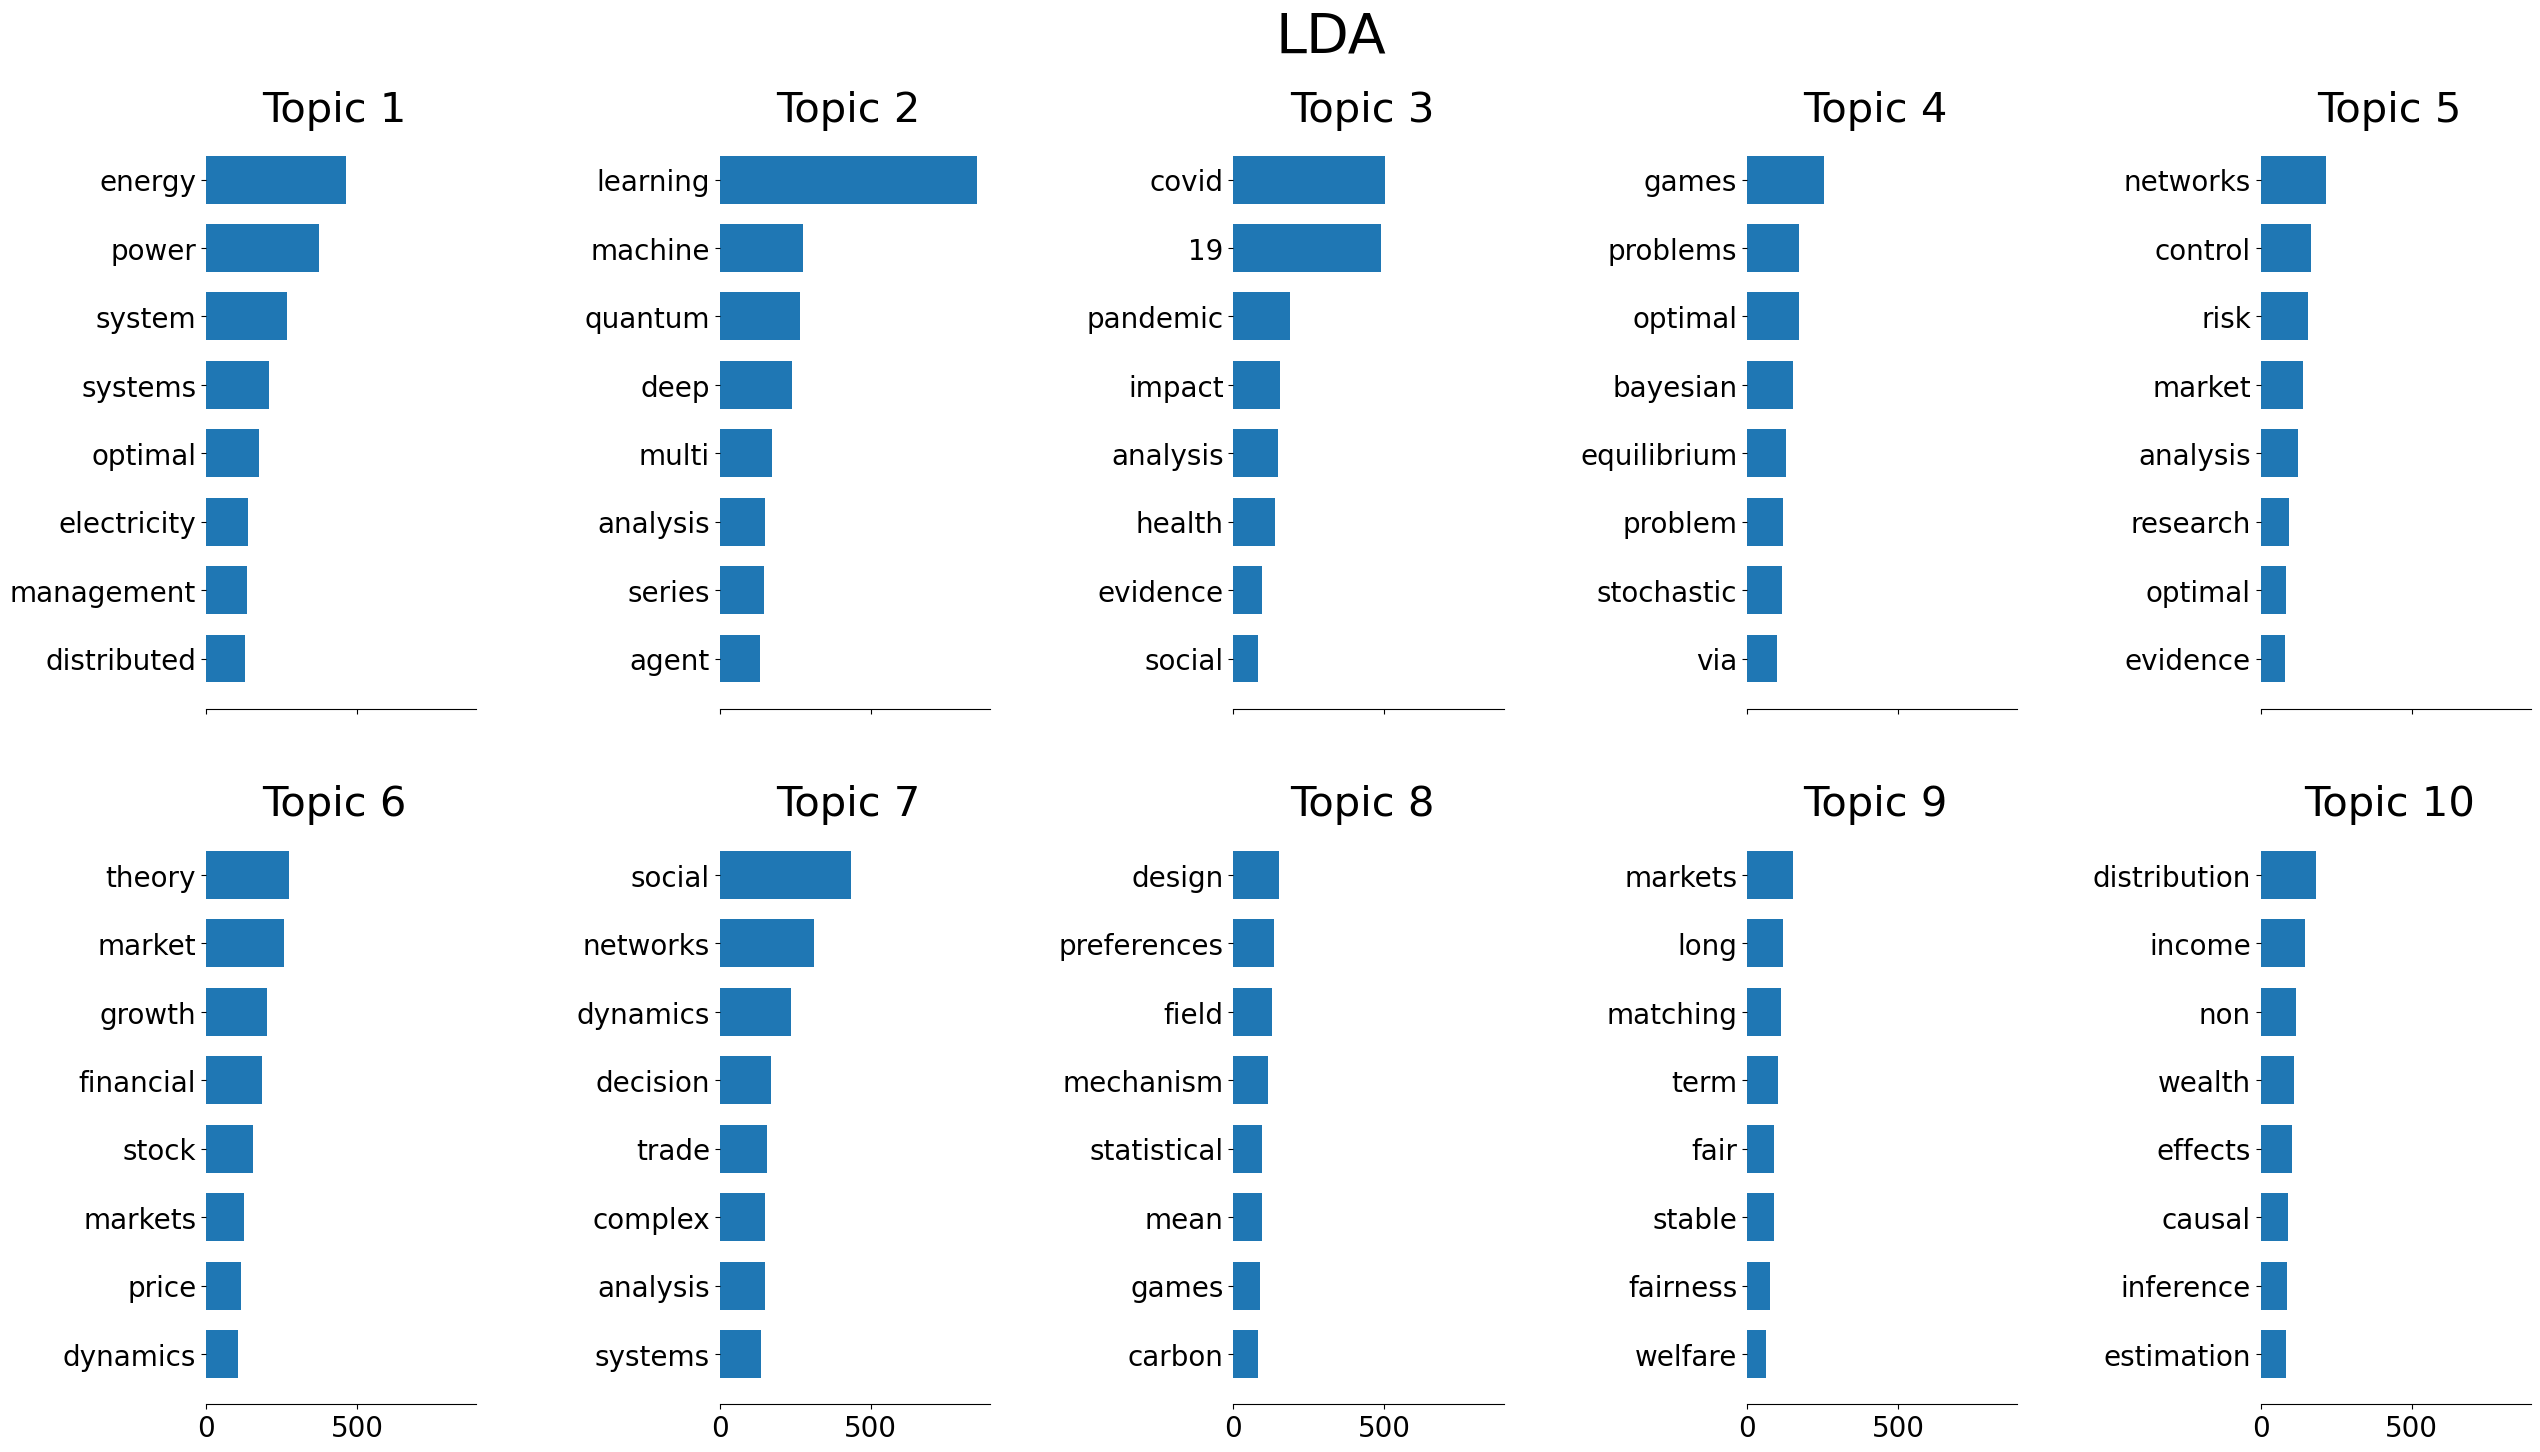

In [2]:
nltk.download('stopwords')
stops = set(stopwords.words('english')).union({'economics', 'economy', 'approach', 'new', 'study', 'models','based', 'model', 'paper','economic', 'time', 'results', 'show','using', 'used', 'also','data', 'network', 'one', 'two'})

conn = sqlite3.connect('../EconomicsFinal.db')

df = pd.read_sql_query('SELECT * FROM EconomicsFinal', conn)

vectorizer = CountVectorizer(stop_words=list(stops))
X = vectorizer.fit_transform(df['title'])

lda = LatentDirichletAllocation(n_components=10, random_state=12345, learning_decay=0.9, max_iter=50)
lda.fit(X)

def plot_top_words(model, feature_names, n_top_words=8):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words-1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx + 1} ", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)

    fig.suptitle("LDA", fontsize=40)

    plt.subplots_adjust(top=.90, bottom=0.05, wspace=0.90, hspace=0.20)
    plt.show()

feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda, feature_names)
